In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("prePlacement.csv")

In [3]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [4]:
dataset.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [5]:
qual=[]
quan=[]
for columnName in dataset.columns:
    if(dataset[columnName].dtype=='O'):
        #print("Qual")
        qual.append(columnName)     #append is to add into the list of columnname
    else:
       # print("Quan")
        quan.append(columnName)

In [6]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [7]:
dataset[quan].cov()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,3870.000000,-52.641355,-58.106028,-40.413645,52.556168,8.102336,2.484009e+05
ssc_p,-52.641355,117.228377,60.348373,42.897137,37.659225,24.535952,1.976764e+04
hsc_p,-58.106028,60.348373,118.755706,34.819820,35.461678,22.555846,4.600806e+04
degree_p,-40.413645,42.897137,34.819820,54.151103,21.929469,17.272020,-8.064357e+03
etest_p,52.556168,37.659225,35.461678,21.929469,176.251018,16.886973,1.571579e+05
mba_p,8.102336,24.535952,22.555846,17.272020,16.886973,34.028376,6.611551e+04
salary,248400.921950,19767.643976,46008.057275,-8064.357161,157157.850783,66115.509283,5.999726e+09


In [8]:
# The variance between degree_p and etest_p is 21.92 (positive covariance but difference is not much high)
# The variance between etest_p and mba_p is 16.88 (positive covariance but difference is not much high)

In [9]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.051550
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.023571
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.054506
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,-0.014148
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.152829
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.146324
salary,0.051550,0.023571,0.054506,-0.014148,0.152829,0.146324,1.000000


In [10]:
# The relationship between mba_p and salary is 0.14(14%) here low degree positve correlation. if mba_p column increases the salary column also increased but relationship value is small

In [11]:
import seaborn as sns

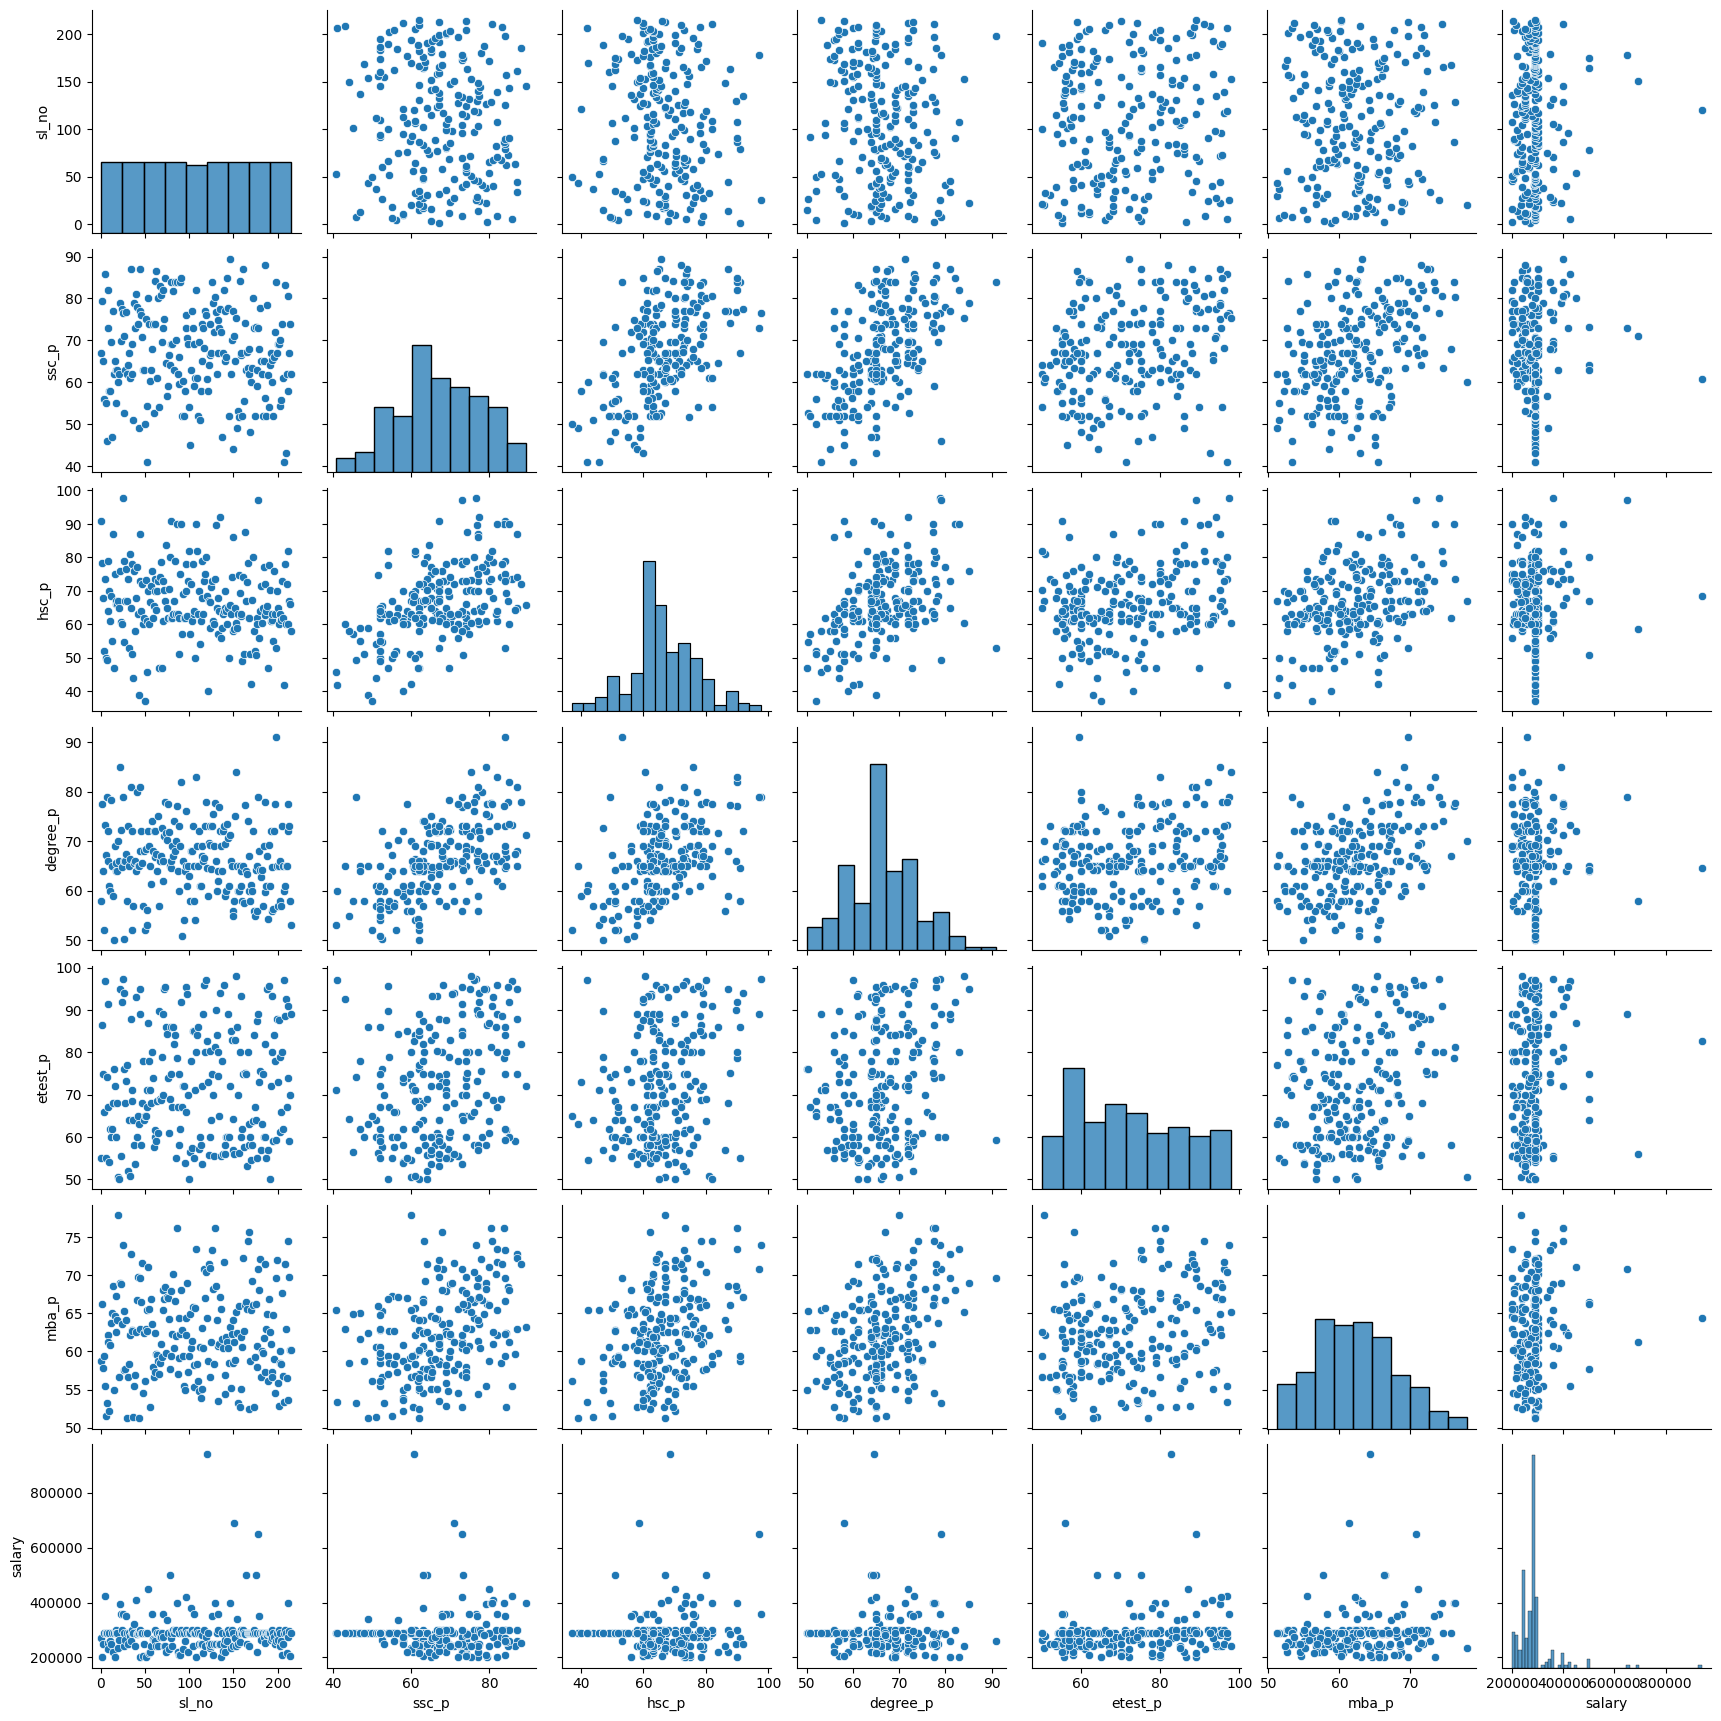

In [12]:
sns.pairplot(dataset[quan])

In [13]:
dataset.drop('sl_no',inplace=True,axis=1)

In [14]:
dataset

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    return vif

In [22]:
calc_vif(dataset[['etest_p', 'salary']])


,variables,VIF
0,etest_p,11.944567
1,salary,11.944567
